<a href="https://colab.research.google.com/github/MinsooKwak/Public_data_analysis/blob/main/%EC%84%9C%EC%9A%B8%EC%8B%9C_%EC%9C%A0%EB%8F%99%EC%9D%B8%EA%B5%AC/%EC%84%9C%EC%9A%B8%EC%8B%9C_%EC%9C%A0%EB%8F%99%EC%9D%B8%EA%B5%AC_23/%EC%84%9C%EC%9A%B8%EC%8B%9C_%EC%9C%A0%EB%8F%99%EC%9D%B8%EA%B5%AC_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

# 경고를 무시합니다.
import warnings
warnings.filterwarnings("ignore")

한글 폰트 설정

In [ ]:
#!sudo apt-get install -y fonts-nanum  ## 폰트설치
#!sudo fc-cache -fv ## 폰트 업데이트
#!rm ~/.cache/matplotlib -rf ## 캐쉬된 matplotlib 폰트 삭제하여 재로딩

In [ ]:
import matplotlib.font_manager as fm  # 폰트 관련 용도

# ttflist에 Nanum 글자 들어가는 폰트 있는지 확인하는 코드
f = [f.name for f in fm.fontManager.ttflist if 'Nanum' in f.name]
f

['NanumMyeongjo',
 'NanumBarunGothic',
 'NanumSquare',
 'NanumSquareRound',
 'NanumSquare',
 'NanumBarunGothic',
 'NanumSquareRound',
 'NanumMyeongjo',
 'NanumGothic',
 'NanumGothic']

In [ ]:
#폰트종류설정
plt.rcParams["font.family"] ='NanumSquare'

# 현재 설정되어 있는 폰트 사이즈와 글꼴을 알아보자
!python --version
def current_font():
  print(f"설정 폰트 글꼴: {plt.rcParams['font.family']}, 설정 폰트 사이즈: {plt.rcParams['font.size']}")  # 파이썬 3.6 이상 사용가능하다
        
current_font()

Python 3.8.10
설정 폰트 글꼴: ['NanumSquare'], 설정 폰트 사이즈: 10.0


In [ ]:
path = '/content/drive/MyDrive/text/NanumSquareR.ttf'  # 설치된 나눔글꼴중 원하는 녀석의 전체 경로를 가져오자
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)

NanumSquare


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/temp_data/스마트서울 도시데이터 센서(S-DoT) 유동인구 측정 정보.csv", encoding = 'cp949')
df.head(3)

,모델번호,시리얼,측정시간,지역,자치구,행정동,방문자수,등록일
0,SDOT001,4003,2023-02-13_23:42:00,main_street,Seocho-gu,Banpo4-dong,116,2023-02-13 23:58:05
1,SDOT001,2998,2023-02-13_23:42:00,traditional_markets,Gangnam-gu,Gaepo2-dong,176,2023-02-13 23:58:05
2,SDOT001,3039,2023-02-13_23:43:00,traditional_markets,Dongjak-gu,Sadang2-dong,192,2023-02-13 23:58:05


In [ ]:
print(f'{df.shape[0]}개의 Data를 갖고 있음')

547585개의 Data를 갖고 있음


결측치 확인

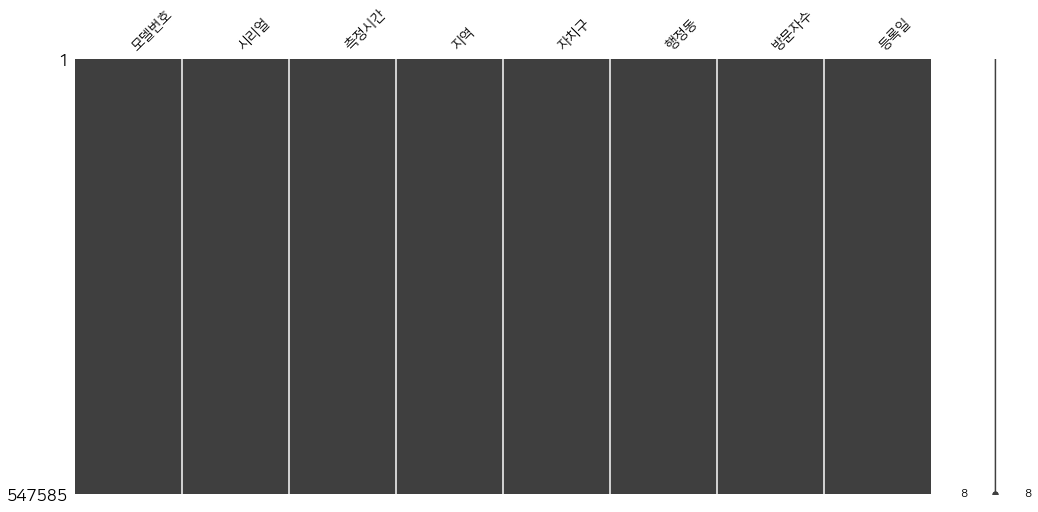

In [ ]:
%matplotlib inline
msno.matrix(df, figsize=(17,8), fontsize=14);

In [ ]:
df['모델번호'].value_counts()

SDOT001    547585
Name: 모델번호, dtype: int64

모델번호는 동일함 => 영향력이 없어 제외

In [ ]:
df.describe().style.background_gradient(axis=None, cmap= sns.light_palette("#C2CEE5", as_cmap=True))

,시리얼,방문자수
count,547585.000000,547585.000000
mean,3603.134083,116.064465
std,502.048654,119.285380
min,2992.000000,0.000000
25%,3021.000000,9.000000
50%,4009.000000,75.000000
75%,4035.000000,196.000000
max,4065.000000,909.000000


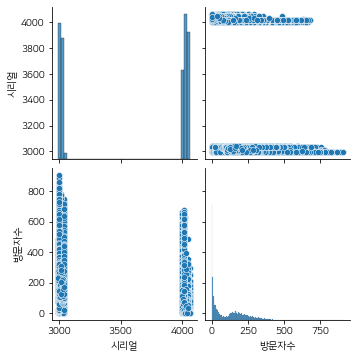

In [ ]:
sns.pairplot(df)

시리얼 번호와 방문자 수가 연관이 있나?

In [ ]:
condition_upper = (df['시리얼'] > 3500)
condition_under = (df['시리얼'] <= 3500)

df_upper = df[condition_upper]
df_under = df[condition_under]

df_upper.head(3)

,모델번호,시리얼,측정시간,지역,자치구,행정동,방문자수,등록일
0,SDOT001,4003,2023-02-13_23:42:00,main_street,Seocho-gu,Banpo4-dong,116,2023-02-13 23:58:05
4,SDOT001,4009,2023-02-13_23:46:00,main_street,Gangnam-gu,Daechi4-dong,81,2023-02-13 23:58:05
5,SDOT001,4008,2023-02-13_23:41:00,main_street,Gangnam-gu,Daechi4-dong,15,2023-02-13 23:58:05


In [ ]:
print(f'df_upper의 데이터 : {df_upper.shape[0]}')
print(f'df_under의 데이터 : {df_under.shape[0]}')

df_upper의 데이터 : 316517
df_under의 데이터 : 231068



**sns.pairplot에서 파라미터 조정**

```
# height을 쓰거나 size를 써도 동일하게 사이즈 조절 가능
```



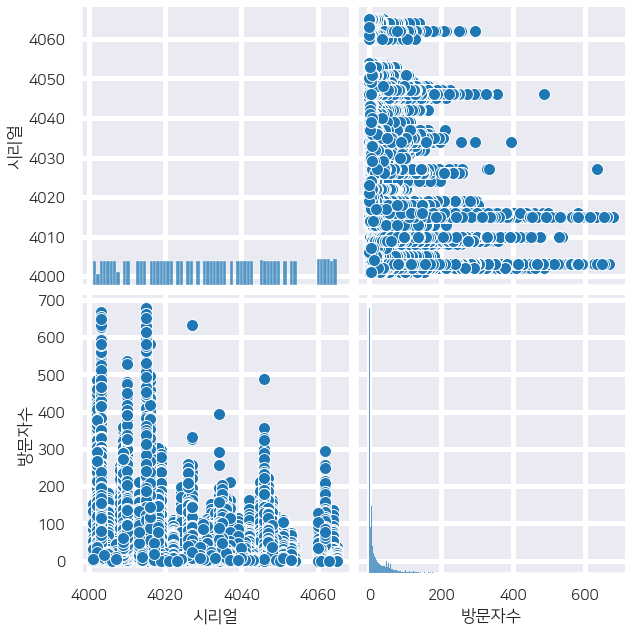

In [ ]:
sns.pairplot(df_upper, size=4.5)

**Insight**

- 시리얼 number 최대가 4010 이하
- 대부분 유사하지만 다른 값을 가지는 경우 있음
- 시리얼 number와 방문자 수 사이에 강한 상관관계는 없는 것으로 보이나, 어느 정도의 연관 가능성이 있으므로 확인 필요 

In [ ]:
df_upper.corr()

,시리얼,방문자수
시리얼,1.00000,-0.30874
방문자수,-0.30874,1.00000


- 약한 음의 상관관계를 보이고 있음
- 시리얼 수 3500 초과 할 경우, **시리얼 수가 방문자 수에 영향**을 미침

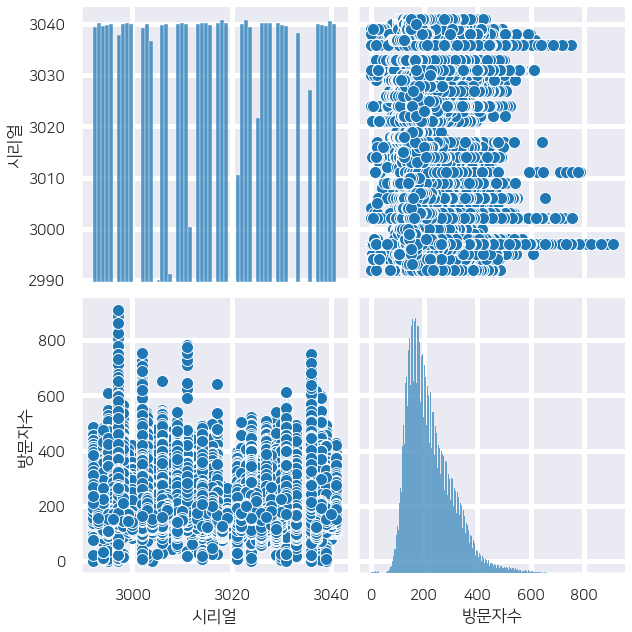

In [ ]:
sns.pairplot(df_under, height= 4.5)

**Insight**

- 시리얼 number가 3500을 초과하는 것과 3500 이하인 것은 다른 경향을 보이고 있음
- 방문자 수의 경우 제법 정규분포 형태를 보이고 있음
- 시리얼 number에 따른 방문자 수의 추세가 상관성을 보이는지는 모르겠으나 확인 필요

In [ ]:
df_under.corr()

,시리얼,방문자수
시리얼,1.000000,-0.052097
방문자수,-0.052097,1.000000


**시리얼 number 3500 이하일 경우에는 시리얼 number가 방문자 수에 영향을 미치지 않음**

**-> 가능한 Action**

```
# serial influence feature 생성 가능
1) 시리얼 number 3500 이하인 경우는 0
2) 시리얼 number 3500 초과일 경우 1
```


In [ ]:
df.head(3)

,모델번호,시리얼,측정시간,지역,자치구,행정동,방문자수,등록일
0,SDOT001,4003,2023-02-13_23:42:00,main_street,Seocho-gu,Banpo4-dong,116,2023-02-13 23:58:05
1,SDOT001,2998,2023-02-13_23:42:00,traditional_markets,Gangnam-gu,Gaepo2-dong,176,2023-02-13 23:58:05
2,SDOT001,3039,2023-02-13_23:43:00,traditional_markets,Dongjak-gu,Sadang2-dong,192,2023-02-13 23:58:05


- 시리얼 넘버 3500 초과할 경우 영향력 있음 (1)
- 시리얼 넘버 3500 이하일 경우 영향력 없음 (0)

In [ ]:
df['serial_inf'] = np.where(df['시리얼'] >3500 , 1 , 0)
df.head(3)

,모델번호,시리얼,측정시간,지역,자치구,행정동,방문자수,등록일,serial_inf
0,SDOT001,4003,2023-02-13_23:42:00,main_street,Seocho-gu,Banpo4-dong,116,2023-02-13 23:58:05,1
1,SDOT001,2998,2023-02-13_23:42:00,traditional_markets,Gangnam-gu,Gaepo2-dong,176,2023-02-13 23:58:05,0
2,SDOT001,3039,2023-02-13_23:43:00,traditional_markets,Dongjak-gu,Sadang2-dong,192,2023-02-13 23:58:05,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 547585 entries, 0 to 547584
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   모델번호        547585 non-null  object
 1   시리얼         547585 non-null  int64 
 2   측정시간        547585 non-null  object
 3   지역          547585 non-null  object
 4   자치구         547585 non-null  object
 5   행정동         547585 non-null  object
 6   방문자수        547585 non-null  int64 
 7   등록일         547585 non-null  object
 8   serial_inf  547585 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 37.6+ MB


- 현재 측정시간 feature와 등록일 feature가 datetime 형태가 아님
- 측정시간왁 등록일 사이에 영향력이 있는지 확인이 필요하기 때문에 datetime 형태로 변환 후 시간 차이를 뽑아낼 수 있음
- 이후 상관관계 확인 가능

In [ ]:
# pd.to_datetime(df['측정시간'])



```
- 그냥 수행할 경우 parsing error로 datetime 변환이 안됨
ex) ParserError: Unknown string format: 2023-02-13_23:42:00
```
- Action : **'_'를 공백으로 변환해줄 것임**


In [ ]:
def replace_under(str1):
  string1 = str1.replace('_',' ')
  return string1

In [ ]:
df['측정시간'] = df['측정시간'].apply(replace_under)
df.head(3)

,모델번호,시리얼,측정시간,지역,자치구,행정동,방문자수,등록일,serial_inf
0,SDOT001,4003,2023-02-13 23:42:00,main_street,Seocho-gu,Banpo4-dong,116,2023-02-13 23:58:05,1
1,SDOT001,2998,2023-02-13 23:42:00,traditional_markets,Gangnam-gu,Gaepo2-dong,176,2023-02-13 23:58:05,0
2,SDOT001,3039,2023-02-13 23:43:00,traditional_markets,Dongjak-gu,Sadang2-dong,192,2023-02-13 23:58:05,0


In [ ]:
df['측정시간'] = pd.to_datetime(df['측정시간'])
df['등록일'] = pd.to_datetime(df['등록일'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 547585 entries, 0 to 547584
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   모델번호        547585 non-null  object        
 1   시리얼         547585 non-null  int64         
 2   측정시간        547585 non-null  datetime64[ns]
 3   지역          547585 non-null  object        
 4   자치구         547585 non-null  object        
 5   행정동         547585 non-null  object        
 6   방문자수        547585 non-null  int64         
 7   등록일         547585 non-null  datetime64[ns]
 8   serial_inf  547585 non-null  int64         
dtypes: datetime64[ns](2), int64(3), object(4)
memory usage: 37.6+ MB


In [ ]:
df['측정지연시간'] = df['등록일'] - df['측정시간']
df.head(3)

,모델번호,시리얼,측정시간,지역,자치구,행정동,방문자수,등록일,serial_inf,측정지연시간
0,SDOT001,4003,2023-02-13 23:42:00,main_street,Seocho-gu,Banpo4-dong,116,2023-02-13 23:58:05,1,0 days 00:16:05
1,SDOT001,2998,2023-02-13 23:42:00,traditional_markets,Gangnam-gu,Gaepo2-dong,176,2023-02-13 23:58:05,0,0 days 00:16:05
2,SDOT001,3039,2023-02-13 23:43:00,traditional_markets,Dongjak-gu,Sadang2-dong,192,2023-02-13 23:58:05,0,0 days 00:15:05


In [ ]:
df['측정지연시간'] = df['측정지연시간'].astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 547585 entries, 0 to 547584
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   모델번호        547585 non-null  object        
 1   시리얼         547585 non-null  int64         
 2   측정시간        547585 non-null  datetime64[ns]
 3   지역          547585 non-null  object        
 4   자치구         547585 non-null  object        
 5   행정동         547585 non-null  object        
 6   방문자수        547585 non-null  int64         
 7   등록일         547585 non-null  datetime64[ns]
 8   serial_inf  547585 non-null  int64         
 9   측정지연시간      547585 non-null  object        
dtypes: datetime64[ns](2), int64(3), object(5)
memory usage: 41.8+ MB
